# Project: Predicting Credit Card Default

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

Load the data from csv file. It contains 15,000 records. Each record has these values:

**Response Variable：**
* Default or Not      

**Predictor Variables:**
1. Balance divided by credit limit.    
2. Age.                  
3. Number of times that 30-59 days past due.   
4. Debt divied by monthly income.                           
5. Monthly income.                 
6. Number of open credit lines and loans.        
7. Number of times that 90 and more days past due.              
8. Number of real estate loans.            
9. Number of times that 60-89 days past due.    
10. Number of dependents.

The goal of this project is to build a credit scoring model by predicting probability of credit default in the future.

In [2]:
import pandas as pd
df=pd.read_csv('./data/cs-training.csv', sep=',', index_col=0)
#print list(df.columns.values)
#print df.info() # basic information
#print data.describe() # basic statistics
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Preprocessing: 
### 1. Data distribution
#### 1.1. Q-Q plot

The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.

In [3]:
from scipy.stats import probplot
def qq_plot(x):
    probplot(x, dist='norm', plot=plt)

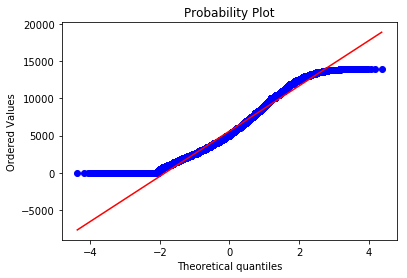

In [4]:
x=df['MonthlyIncome']
qq_plot(x[x<14000])

#### 1.2. KDE plot
In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

In [5]:
from scipy.stats.kde import gaussian_kde
def kde_plot(x):   
    kde = gaussian_kde(x)
    positions = np.linspace(x.min(), x.max())
    smoothed = kde(positions)
    plt.plot(positions, smoothed)
    
def kde_values(x):   
    kde = gaussian_kde(x)
    positions = np.linspace(x.min(), x.max())
    smoothed = kde(positions)
    return positions, smoothed

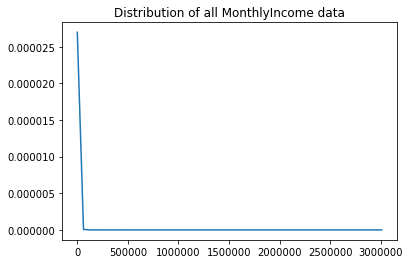

In [6]:
x=df['MonthlyIncome']
x=x.dropna()
kde_plot(x)
plt.title("Distribution of all MonthlyIncome data")
plt.show()

## Preprocessing: 
### 2. Outliers detection 
Set all values that are greater then 99 percentile be NaN.

In [7]:
print x.quantile(0.99), x.quantile(0.01)

25000.0 0.0


<function matplotlib.pyplot.show>

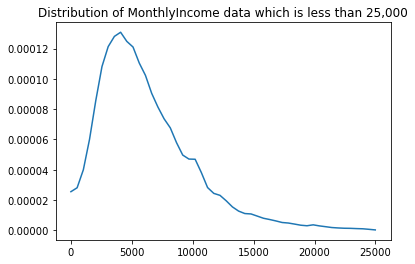

In [8]:
kde_plot(x[x<25000])
plt.title("Distribution of MonthlyIncome data which is less than 25,000")
plt.show

In [9]:
for col in range(1,11):
    m=df.iloc[:,col].dropna().quantile(0.99)
    df.iloc[:,col]=df.iloc[:,col].map(lambda x: None if x>m else x)

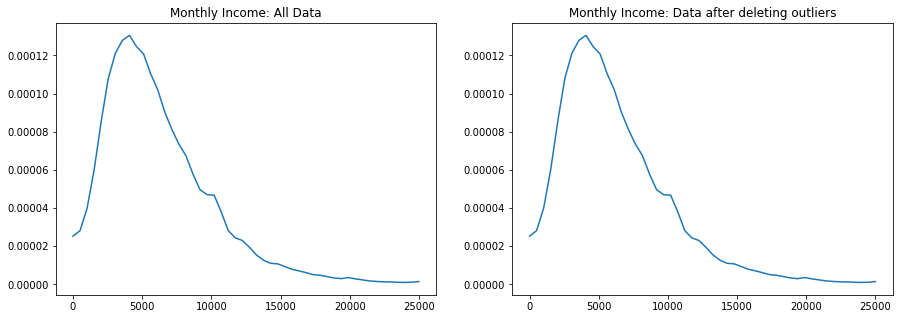

In [10]:
x=df['MonthlyIncome']
x=x.dropna()

plt.rcParams['figure.figsize'] = (15,5)
f, (ax1, ax2) = plt.subplots(1, 2)
positions, smoothed = kde_values(x)
ax1.plot(positions, smoothed)
ax1.set_title('Monthly Income: All Data')
positions, smoothed = kde_values(x[x<50000])
ax2.plot(positions, smoothed)
ax2.set_title('Monthly Income: Data after deleting outliers')
plt.show()

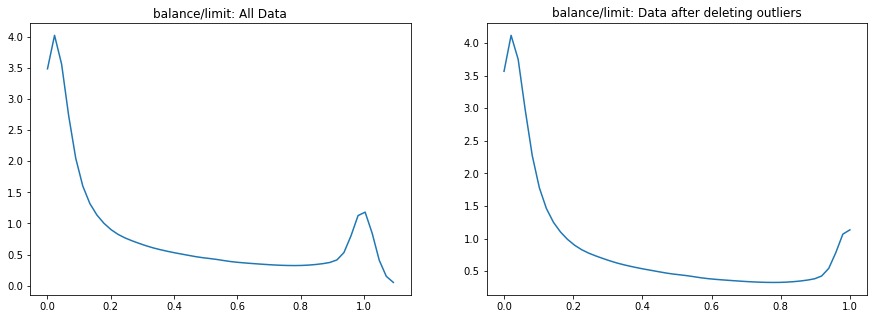

In [11]:
x=df.iloc[:,1] # balance/limit
x=x.dropna()

plt.rcParams['figure.figsize'] = (15,5)
f, (ax1, ax2) = plt.subplots(1, 2)
positions, smoothed = kde_values(x)
ax1.plot(positions, smoothed)
ax1.set_title('balance/limit: All Data')
positions, smoothed = kde_values(x[x<1])
ax2.plot(positions, smoothed)
ax2.set_title('balance/limit: Data after deleting outliers')
plt.show()

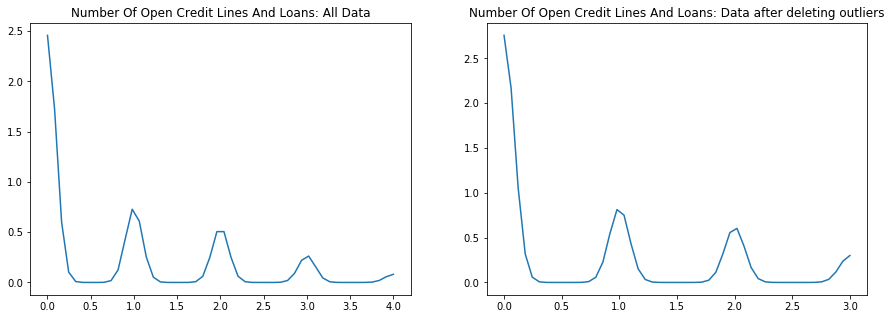

In [12]:
# NumberOfOpenCreditLinesAndLoans

x=df.iloc[:,10]
x=x.dropna()
m=x.quantile(0.99)

plt.rcParams['figure.figsize'] = (15,5)
f, (ax1, ax2) = plt.subplots(1, 2)
positions, smoothed = kde_values(x)
ax1.plot(positions, smoothed)
ax1.set_title('Number Of Open Credit Lines And Loans: All Data')
positions, smoothed = kde_values(x[x<m])
ax2.plot(positions, smoothed)
ax2.set_title('Number Of Open Credit Lines And Loans: Data after deleting outliers')
plt.show()

# Preprocessing: 
### 3. Missing value
Replace all nan values as mean values.

In [13]:
y=df.iloc[:,0].fillna(df.mean()).as_matrix()
x=df.iloc[:,1:].fillna(df.mean()).as_matrix()
print y.shape
print x.shape



(150000,)
(150000, 10)


# Preprocessing: 
### Normalize

In [14]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)

## Choose One Model

# Logistic Classification

In [15]:
from sklearn.linear_model import LogisticRegression

classify = LogisticRegression() # You can adjust some paraments here.
classify.fit(x,y)

y_pred = classify.predict(x)
classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
print("classif_rate for %s : %f " % ('LogisticRegression', classif_rate))
print classify.coef_
print df.columns.values[1:]

classif_rate for LogisticRegression : 93.495333 
[[ 0.65325033 -0.26800732  0.31643459 -0.06334876 -0.12870973  0.16941767
   0.30578249  0.02286036  0.23021435  0.03825552]]
['RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
# Logistic Classification
classify = RandomForestClassifier(n_estimators=25) # You can adjust some paraments here.
classify.fit(x,y)

y_pred = classify.predict(x)
classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
print("classif_rate for %s : %f " % ('RandomForestClassifier', classif_rate))
print classify.feature_importances_

classif_rate for LogisticRegression : 99.788667 
[ 0.18102202  0.13208024  0.05349793  0.18058781  0.1476976   0.09059211
  0.09212074  0.03072895  0.04856799  0.04310462]


# Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

classify = GradientBoostingClassifier(n_estimators=25) # You can adjust some paraments here.
classify.fit(x,y)

y_pred = classify.predict(x)
classif_ra# Logistic Classificationte = np.mean(y_pred.ravel() == y.ravel()) * 100
print("classif_rate for %s : %f " % ('GradientBoostingClassifier', classif_rate))
print classify.feature_importances_

classif_rate for LogisticRegression : 93.688667 
[ 0.22963866  0.03874248  0.19320854  0.0213943   0.00815392  0.01059162
  0.36328911  0.0012144   0.13307906  0.00068793]


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

classify = DecisionTreeClassifier() # You can adjust some paraments here.
classify.fit(x,y)

y_pred = classify.predict(x)
classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
print("classif_rate for %s : %f " % ('DecisionTreeClassifier', classif_rate))
print classify.feature_importances_

classif_rate for DecisionTreeClassifier : 99.968000 
[ 0.18470548  0.12112265  0.04129746  0.19892734  0.15300062  0.0794152
  0.12443673  0.02718279  0.02668176  0.04322998]


# SVM

In [ ]:
from sklearn.svm import SVC

classify = SVC(kernel='linear') # You can adjust some paraments here.
classify.fit(x,y)

y_pred = classify.predict(x)
classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
print("classif_rate for %s : %f " % ('SVC', classif_rate))
print classify.coef_

# Plot Result

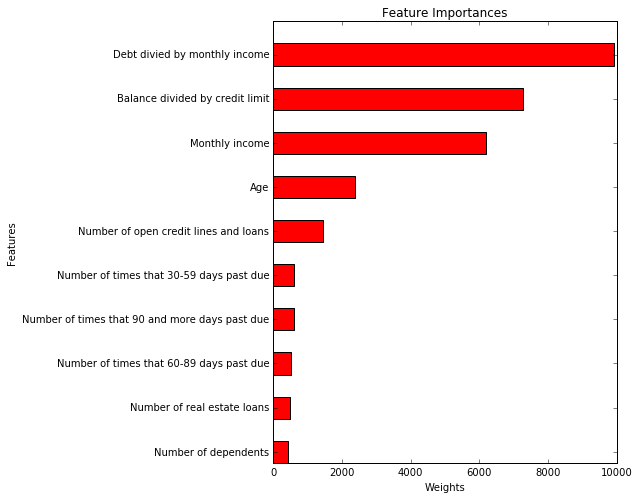

In [17]:
features=np.array([ "Balance divided by credit limit",
                    "Age",
                    "Number of times that 30-59 days past due",
                    "Debt divied by monthly income",
                    "Monthly income",
                    "Number of open credit lines and loans",
                    "Number of times that 90 and more days past due",
                    "Number of real estate loans",
                    "Number of times that 60-89 days past due",
                    "Number of dependents"])
value=scores.values()
ind=sorted(range(len(value)),reverse=False,key=lambda k: value[k])
features=features[ind]
value=sorted(value,reverse=False)
ind=np.array(range(10))
plt.rcParams['figure.figsize'] = (9,7)
plt.barh(bottom=ind,height=0.5,width=value,color='r')
plt.yticks(ind+0.25,features)
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Feature Importances')
#plt.subplots_adjust(left=0.2)
plt.tight_layout()
#plt.savefig('feature_importances.png', format='png', dpi=300)
plt.show()